In [76]:
from sklearn.datasets import make_regression
import numpy as np

X, y = make_regression(n_samples=400, n_features=1, noise=5, random_state=42)
print(f"X shape: {X.shape}")
X_b = np.c_[np.ones((y.shape[0], 1)), X]
y = np.expand_dims(y, axis=1)
print(f"X_b shape: {X_b.shape}")

X shape: (400, 1)
X_b shape: (400, 2)


In [53]:
def loss_fn(X_b, y, theta):
    return 1/y.shape[0]*np.sum((X_b.dot(theta) - y)**2)
def loss_derrivative_fn(X_b, y, theta):
    return 2/y.shape[0] *np.sum(X_b.T.dot(X_b.dot(theta) - y))

In [81]:
theta =  np.random.randn(2,1)
n_iterations = 10
eta = 1e-1
history = dict()
for iteration in range(n_iterations):
    history.setdefault("theta", []).append(theta)
    history.setdefault("loss", []).append(loss_fn(X_b, y, theta))
    history.setdefault("loss_derrivative", []).append(loss_derrivative_fn(X_b, y, theta))
    gradients = 2/y.shape[0] *np.sum(X_b.T.dot(X_b.dot(theta) - y))
    theta = theta - eta * gradients


In [75]:
print(X_b.dot(theta).shape)
print(np.expand_dims(y, axis=1).shape)
mse = (X_b.dot(theta) - np.expand_dims(y, axis=1))**2
print(mse.shape)

(400, 1)
(400, 1)
(400, 1)


In [82]:
history["loss"]

[1467.247603681268,
 1057.0271265825172,
 905.9301123488004,
 850.2763627558754,
 829.7773485333905,
 822.2269213444367,
 819.4458631863738,
 818.4215126052776,
 818.0442122924634,
 817.9052408029391]

In [83]:
history["loss_derrivative"]

[-71.45437695688267,
 -43.36587466921092,
 -26.318878785557214,
 -15.973006097825788,
 -9.694065080811438,
 -5.883357034703649,
 -3.570626946409989,
 -2.1670241522357903,
 -1.3151734266427366,
 -0.7981826784730538]

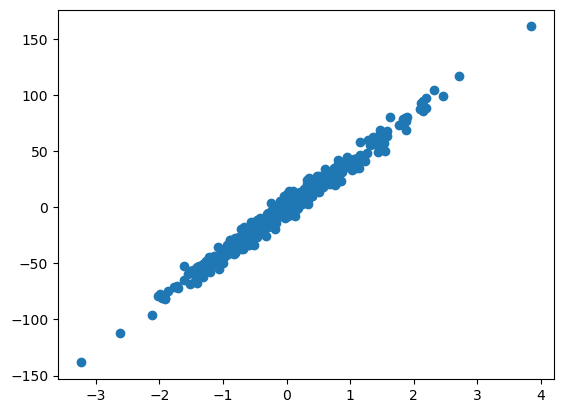

In [84]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], y)
